In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sk


In [24]:
dt = pd.read_excel(r'BloodPressureData.xlsx')
# 250, 5 dimension

In [25]:
dt

X = dt[['Initial systolic pressure (mm Hg)', 'Drug dose (mg)']]
y = dt['Systolic pressure after treatment (mm Hg)']

In [26]:
#using normal equation 

X_m = X.to_numpy()
y_m = y.to_numpy()

In [28]:
ones_column = np.ones((X_m.shape[0], 1))
X_m = np.hstack((ones_column, X_m))


In [29]:
X_m

array([[  1.        , 171.22188892,   7.14483334],
       [  1.        , 166.42606361,   7.98424627],
       [  1.        , 163.6767596 ,   7.2710924 ],
       [  1.        , 146.62148612,   7.77062818],
       [  1.        , 142.75264468,   7.23309936],
       [  1.        , 160.08114844,   6.83164886],
       [  1.        , 136.72504315,  10.2924609 ],
       [  1.        , 177.41025871,   7.06532621],
       [  1.        , 148.08937074,   7.97685177],
       [  1.        , 179.77924174,   8.27665314],
       [  1.        , 150.14230609,   7.75139358],
       [  1.        , 135.87834776,   5.877679  ],
       [  1.        , 160.26219151,   7.77172601],
       [  1.        , 140.43353632,   9.07744326],
       [  1.        , 151.61114349,   7.40173537],
       [  1.        , 137.70522183,   6.19116211],
       [  1.        , 159.2028728 ,   8.16389452],
       [  1.        , 165.82044481,   7.50970484],
       [  1.        , 157.96676353,   6.11204044],
       [  1.        , 151.62322

using normal equation

In [25]:
X_t = X_m.transpose()

theta = np.linalg.inv(X_t.dot(X_m)).dot(X_t).dot(y_m)
theta

array([-1.73561778,  1.02320923, -3.05954588])

In [33]:

model  = sk.LinearRegression()
model.fit(X.to_numpy(),y.ravel())
model.intercept_, model.coef_


(-1.7356177841251395, array([ 1.02320923, -3.05954588]))

statsmodel 

In [10]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X = dt[['Initial systolic pressure (mm Hg)', 'Drug dose (mg)']]
y = dt['Systolic pressure after treatment (mm Hg)']
X = sm.add_constant(X)

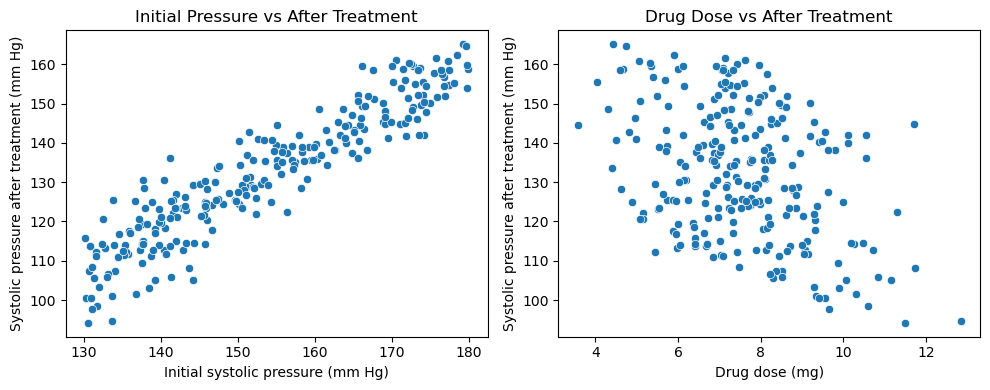

In [11]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=dt, x='Initial systolic pressure (mm Hg)', y='Systolic pressure after treatment (mm Hg)')
plt.title('Initial Pressure vs After Treatment')

# Scatter plot for 'Drug dose (mg)'
plt.subplot(1, 2, 2)
sns.scatterplot(data=dt, x='Drug dose (mg)', y='Systolic pressure after treatment (mm Hg)')
plt.title('Drug Dose vs After Treatment')

plt.tight_layout()
plt.show()

In [8]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Systolic pressure after treatment (mm Hg)   R-squared:                       0.953
Model:                                                   OLS   Adj. R-squared:                  0.953
Method:                                        Least Squares   F-statistic:                     2498.
Date:                                       Sun, 17 Sep 2023   Prob (F-statistic):          1.36e-164
Time:                                               22:59:05   Log-Likelihood:                -673.85
No. Observations:                                        250   AIC:                             1354.
Df Residuals:                                            247   BIC:                             1364.
Df Model:                                                  2                                         
Covariance Type:                                   nonrobust                      

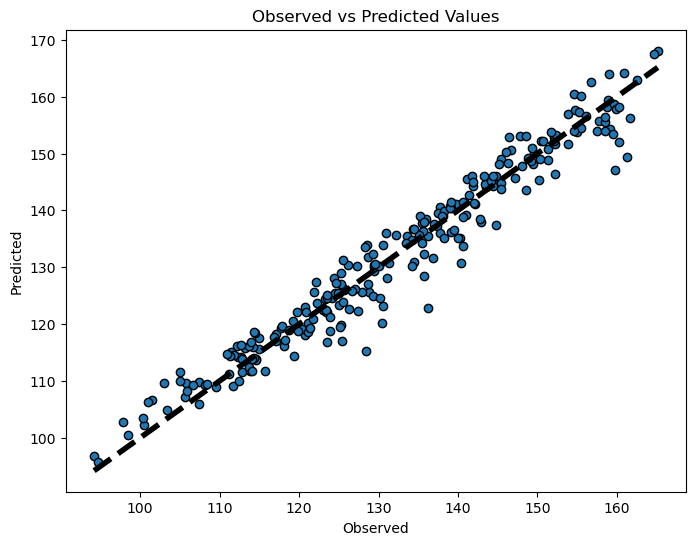

In [17]:

predicted_values = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()


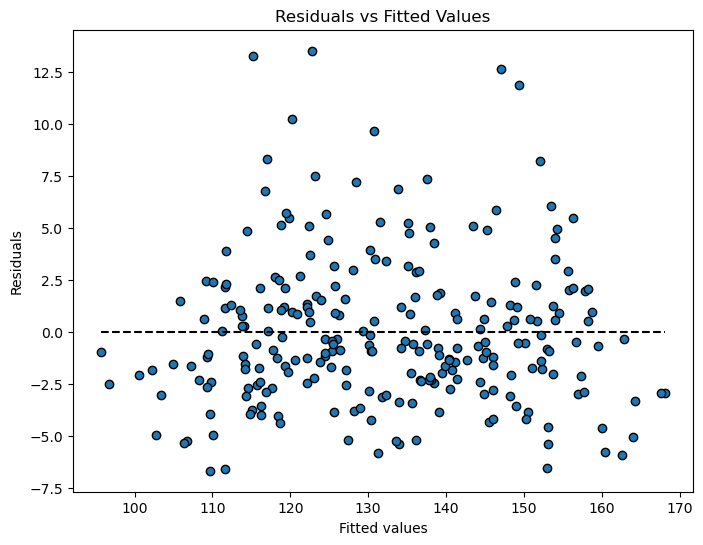

In [16]:
residuals = y - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, edgecolor='k')
plt.hlines(0, predicted_values.min(), predicted_values.max(), colors='k', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


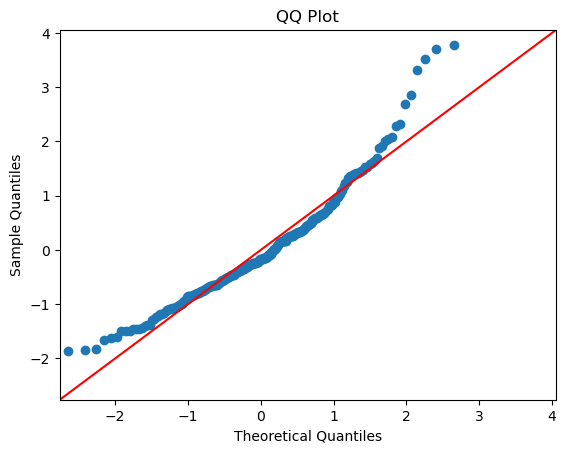

In [15]:
residuals = y - predicted_values
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

batch gd

In [33]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) 
for iteration in range(n_iterations):
 gradients = 2/m * X_m.T.dot(X_m.dot(theta) - y)
 theta = theta - eta * gradients

ValueError: shapes (250,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

In [30]:
X_m

array([[  1.        , 171.22188892,   7.14483334],
       [  1.        , 166.42606361,   7.98424627],
       [  1.        , 163.6767596 ,   7.2710924 ],
       [  1.        , 146.62148612,   7.77062818],
       [  1.        , 142.75264468,   7.23309936],
       [  1.        , 160.08114844,   6.83164886],
       [  1.        , 136.72504315,  10.2924609 ],
       [  1.        , 177.41025871,   7.06532621],
       [  1.        , 148.08937074,   7.97685177],
       [  1.        , 179.77924174,   8.27665314],
       [  1.        , 150.14230609,   7.75139358],
       [  1.        , 135.87834776,   5.877679  ],
       [  1.        , 160.26219151,   7.77172601],
       [  1.        , 140.43353632,   9.07744326],
       [  1.        , 151.61114349,   7.40173537],
       [  1.        , 137.70522183,   6.19116211],
       [  1.        , 159.2028728 ,   8.16389452],
       [  1.        , 165.82044481,   7.50970484],
       [  1.        , 157.96676353,   6.11204044],
       [  1.        , 151.62322